In [1]:
## Importing libraries

from datetime import datetime, date, timedelta
from IPython.display import display, clear_output
import time
from array import *
import numpy as np
import gc
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig
import seaborn as sns
import pandas as pd
import csv
import json
import math
import datetime as dt
import pymongo as pym

In [ ]:
## Variables to connect to the DB

myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SMARTAttFullBackBlaze"]
mycol = mydb["s_m_a_r_t_att_full_back_blaze"]

#models = ["HGST HMS5C4040BLE640", "HGST HUH728080ALE600", "HGST HUH721212ALN604", "ST4000DM000", "ST8000NM0055", "ST12000NM0008", "ST12000NM0007", "ST14000NM001G", "ST14000NM0138", "ST16000NM001G", "TOSHIBA MD04ABA400V", "TOSHIBA MG07ACA14TA", "WDC WUH721414ALE6L4"]
model = "WDC WUH721414ALE6L4"
myquery = { "model": { "$eq": model }}
myfields = {"timestamp":1, "disk_id":1, "model":1, "failure":1, "_id":0, "r_sectors":1, "u_errors":1, "n_b_written":1, "command_timeout":1, "current_pending_sector_count":1, "uncorrectable_sector_count":1}

mydoc = mycol.find(myquery, myfields)

list = list(mydoc)
dfAllInformationPerHDDModel =  pd.DataFrame(list)

In [2]:
## Alternative for loading data from a specific model
## 3 files can be loaded: information concerning smart attribute, failed HDDs, and operational HDDs

#models = ["HGST HMS5C4040BLE640", "HGST HUH728080ALE600", "HGST HUH721212ALN604", "ST4000DM000", "ST8000NM0055", "ST12000NM0008", "ST12000NM0007", "ST14000NM001G", "ST14000NM0138", "ST16000NM001G", "TOSHIBA MD04ABA400V", "TOSHIBA MG07ACA14TA", "WDC WUH721414ALE6L4"]

model = "ST8000NM0055"

dfAllInformationPerHDDModel = pd.read_csv('SplittedDatasetHDD/' + 'allInformationPerHDDModel' + model + '.csv')
#failedHDD = pd.read_csv('SplittedDatasetHDD/' + 'FailedHDDPerModel' + model + '.csv')
#operationalHDD = pd.read_csv('SplittedDatasetHDD/' + 'OperationalHDDPerModel' + model + '.csv')

In [3]:
## Checking that the data has been loaded correctly

dfAllInformationPerHDDModel.head()

,Unnamed: 0,timestamp,disk_id,model,failure,r_sectors,u_errors,n_b_written,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,0,2021-02-07,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,1,2021-02-08,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,1.546495e+09,0.0,0.0,0.0
2,2,2021-02-09,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,1.984626e+09,0.0,0.0,0.0
3,3,2021-02-10,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,2.900202e+09,0.0,0.0,0.0
4,4,2021-02-11,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,3.339698e+09,0.0,0.0,0.0


In [3]:
## group per day (daily mean) - reallocated sectors

group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'r_sectors'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_43622/2443751835.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'r_sectors'].mean()


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_43622/987038418.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.scatterplot(x = "n_b_written", y = 'r_sectors', palette = 'deep',marker='+', data = group, alpha=0.9)


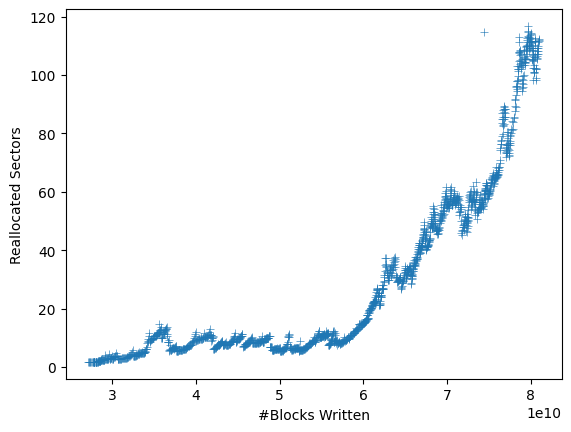

In [4]:
graph = sns.scatterplot(x = "n_b_written", y = 'r_sectors', palette = 'deep',marker='+', data = group, alpha=0.9)
graph.set(xlabel ="#Blocks Written", ylabel = "Reallocated Sectors")
#sns.set(font_scale=1)
plt.savefig('img/HDDReallocatedSectorsWritenBlocks' + model + '.pdf', dpi=1200)

In [7]:
## group per day (daily mean) - uncorrectable errors

group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'u_errors'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_87715/33252946.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'u_errors'].mean()


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_87715/1185037393.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.scatterplot(x = "n_b_written", y = 'u_errors', palette = 'deep',marker='+',  data = group, alpha=1)


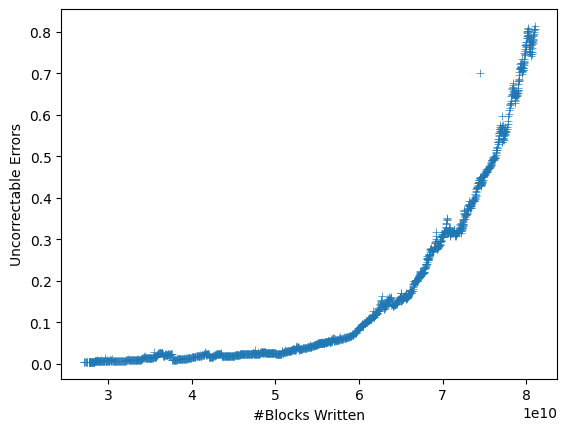

In [8]:
graph = sns.scatterplot(x = "n_b_written", y = 'u_errors', palette = 'deep',marker='+',  data = group, alpha=1)
graph.set(xlabel ="#Blocks Written", ylabel = "Uncorrectable Errors")
plt.savefig('img/HDDUncorrectableErrorsWritenBlocks' + model + '.pdf', dpi=1200)

In [10]:
## group per day (daily mean) - command timeout

group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'command_timeout'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_87715/2747041450.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'command_timeout'].mean()


In [11]:
## Removing outliers

group.drop(group[group.command_timeout < 2.025803e+08].index, inplace=True)
group.drop(group[group.command_timeout > 5.598217e+08].index, inplace=True)

In [12]:
## Checking the resulting dataframe

group.head()

,timestamp,n_b_written,command_timeout
2,2018-01-03,2.725681e+10,2.031770e+08
3,2018-01-04,2.731745e+10,2.031770e+08
4,2018-01-05,2.738682e+10,2.031770e+08
6,2018-01-07,2.752496e+10,2.034754e+08
7,2018-01-08,2.768602e+10,2.060517e+08


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_87715/3998566086.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.scatterplot(x = "n_b_written", y = 'command_timeout', palette = 'deep',marker='+', data = group, alpha=0.9)


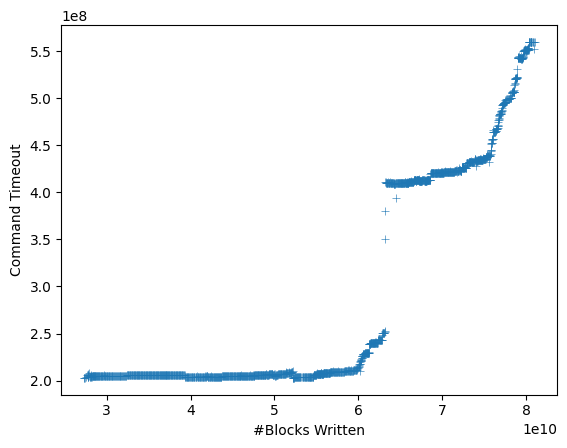

In [13]:
graph = sns.scatterplot(x = "n_b_written", y = 'command_timeout', palette = 'deep',marker='+', data = group, alpha=0.9)
graph.set(xlabel ="#Blocks Written", ylabel = "Command Timeout")
plt.savefig('img/HDDCommandTimeoutWritenBlocks' + model + '.pdf')

In [15]:
## group per day (daily mean) - current pending sector count

group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'current_pending_sector_count'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_87715/581711363.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'current_pending_sector_count'].mean()


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_87715/1873546383.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.scatterplot(x = "n_b_written", y = 'current_pending_sector_count', palette = 'deep', marker='+', data = group, alpha=0.9)


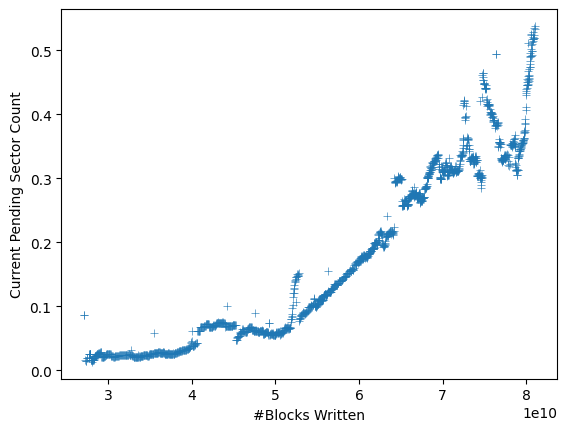

In [16]:
graph = sns.scatterplot(x = "n_b_written", y = 'current_pending_sector_count', palette = 'deep', marker='+', data = group, alpha=0.9)
graph.set(xlabel ="#Blocks Written", ylabel = "Current Pending Sector Count")
plt.savefig('img/HDDCurrentPendingSectorCountWritenBlocks' + model + '.pdf')

In [18]:
## group per day (daily mean) - uncorrectable sector count

group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'uncorrectable_sector_count'].mean()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_87715/2108014959.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'uncorrectable_sector_count'].mean()


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_87715/3795073442.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.scatterplot(x = "n_b_written", y = 'uncorrectable_sector_count', palette = 'deep',marker='+', data = group, alpha=0.9)


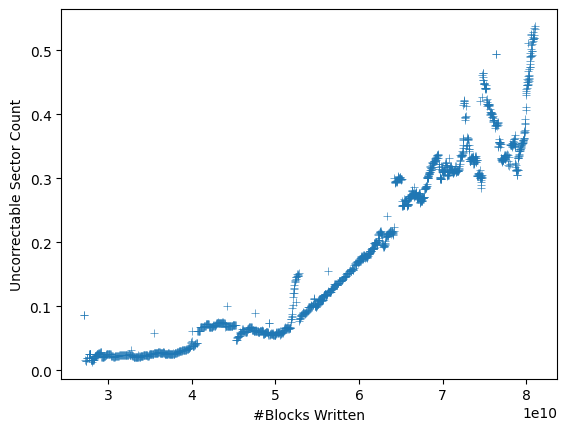

In [19]:
graph = sns.scatterplot(x = "n_b_written", y = 'uncorrectable_sector_count', palette = 'deep',marker='+', data = group, alpha=0.9)
graph.set(xlabel ="#Blocks Written", ylabel = "Uncorrectable Sector Count")
plt.savefig('img/HDDUnccorectableSectorCountWritenBlocks' + model + '.pdf')

In [5]:
## Loading information from a specific model about smart attributes and failures
## For the following analyses, information from smart attributes and failures from a specific HDD model will be used

#models = ["HGST HMS5C4040BLE640", "HGST HUH728080ALE600", "HGST HUH721212ALN604", "ST4000DM000", "ST8000NM0055", "ST12000NM0008", "ST12000NM0007", "ST14000NM001G", "ST14000NM0138", "ST16000NM001G", "TOSHIBA MD04ABA400V", "TOSHIBA MG07ACA14TA", "WDC WUH721414ALE6L4"]

model = "ST8000NM0055"

dfAllInformationPerHDDModel = pd.read_csv('SplittedDatasetHDD/' + 'allInformationPerHDDModel' + model + '.csv')
failedHDD = pd.read_csv('SplittedDatasetHDD/' + 'FailedHDDPerModel' + model + '.csv')
#operationalHDD = pd.read_csv('SplittedDatasetHDD/' + 'OperationalHDDPerModel' + model + '.csv')

In [6]:
## group per day (daily mean) - uncorrectable sector count

#failedHDD['timestamp'] = pd.to_datetime(failedHDD['timestamp'], format='%Y-%m-%d').dt.floor('D')

groupHDDFailures = failedHDD.groupby(['timestamp'], as_index=False)['disk_id'].count()
groupHDDFailures['disk_sum'] = groupHDDFailures.disk_id.cumsum()

groupHDDBlocks = failedHDD.groupby(['timestamp', 'disk_id'], as_index=False)['n_b_written'].mean()
groupHDDFailures['blocks_sum'] = groupHDDBlocks.n_b_written

In [4]:
## Checking the resulting dataframe

groupHDDFailures.head()

,timestamp,disk_id,disk_sum,blocks_sum
0,2018-01-02,1,1,1.568691e+10
1,2018-01-09,1,2,2.603956e+10
2,2018-01-10,1,3,3.356442e+10
3,2018-01-11,2,5,2.083136e+10
4,2018-01-15,1,6,1.894737e+10


In [48]:
## Checking the resulting dataframe

dfAllInformationPerHDDModel.head()

,Unnamed: 0,timestamp,disk_id,model,failure,r_sectors,u_errors,n_b_written,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,0,2021-02-07,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,1,2021-02-08,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,1.546495e+09,0.0,0.0,0.0
2,2,2021-02-09,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,1.984626e+09,0.0,0.0,0.0
3,3,2021-02-10,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,2.900202e+09,0.0,0.0,0.0
4,4,2021-02-11,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,3.339698e+09,0.0,0.0,0.0


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_43622/4171305727.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  graph = sns.scatterplot(x = "blocks_sum", y = 'disk_sum', palette = 'deep',marker='+', data = groupHDDFailures, alpha=0.9)


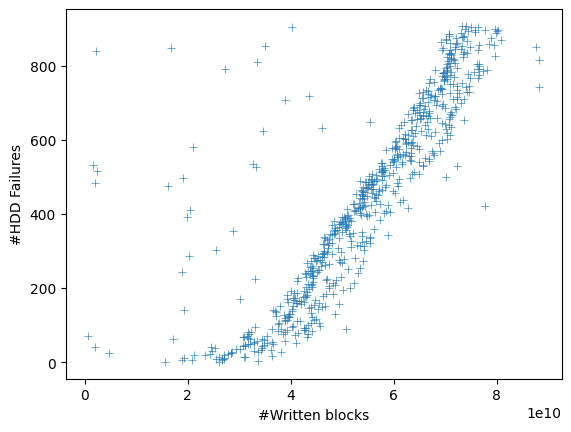

In [12]:
## Plotting the number of failures from a specific HDD model against the number of written blocks

graph = sns.scatterplot(x = "blocks_sum", y = 'disk_sum', palette = 'deep',marker='+', data = groupHDDFailures, alpha=0.9)
graph.set(xlabel ="#Written blocks", ylabel = "#HDD Failures")
plt.savefig('img/HDDFailuresBlocksWrittenScatter' + model + '.pdf')
#plt.setp(graph.get_xticklabels(), rotation=45)


In [6]:
## Calculating the number of written blocks and operational days for checking their correlation in failed HDDss

groupHDDFailures = failedHDD.groupby(['timestamp'], as_index=False)['disk_id'].count()
groupHDDFailures['disk_sum'] = groupHDDFailures.disk_id.cumsum()

groupHDDBlocks = failedHDD.groupby(['timestamp', 'disk_id'], as_index=False)['n_b_written'].mean()
groupHDDFailures['written_blocks'] = groupHDDBlocks.n_b_written
groupHDDFailures['written_blocks_cum'] = groupHDDBlocks.n_b_written.cumsum()

In [7]:
## Checking the resulting dataframe

groupHDDFailures.head()

,timestamp,disk_id,disk_sum,written_blocks,written_blocks_cum
0,2018-01-02,1,1,1.568691e+10,1.568691e+10
1,2018-01-09,1,2,2.603956e+10,4.172648e+10
2,2018-01-10,1,3,3.356442e+10,7.529089e+10
3,2018-01-11,2,5,2.083136e+10,9.612225e+10
4,2018-01-15,1,6,1.894737e+10,1.150696e+11


In [7]:
## Creating a dataframe combining the dataframe related to the failures and the dataframe containing information about the smart attributes

groupAllInformationPerHDDModel = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['disk_id'].count()
groupAllInformationPerHDDModel['disk_sum'] = groupAllInformationPerHDDModel.disk_id.cumsum()

groupHDDBlocksAllInformationPerHDDModel = dfAllInformationPerHDDModel.groupby(['timestamp', 'disk_id'], as_index=False)['n_b_written'].sum()
groupAllInformationPerHDDModel['written_blocks'] = groupHDDBlocksAllInformationPerHDDModel.n_b_written
groupAllInformationPerHDDModel['written_blocks_cum'] = groupHDDBlocksAllInformationPerHDDModel.n_b_written.cumsum()

groupHDDFailuresCopy = groupHDDFailures.copy()
groupHDDFailuresCopy.drop(columns=["written_blocks", "written_blocks_cum"], inplace=True)
groupHDDFailuresCopy.rename(columns = {'disk_id':'failed'}, inplace=True)
groupHDDFailuresCopy.rename(columns = {'disk_sum':'failed_sum'}, inplace=True)
groupAllInformationPerHDDModel = pd.merge(groupAllInformationPerHDDModel, groupHDDFailuresCopy, how='left', on=['timestamp'])
groupAllInformationPerHDDModel = groupAllInformationPerHDDModel.fillna(0)

In [8]:
## Checking the resulting dataframe

groupAllInformationPerHDDModel.head()

,timestamp,disk_id,disk_sum,written_blocks,written_blocks_cum,failed,failed_sum
0,2018-01-01,14396,14396,3.320467e+10,3.320467e+10,0.0,0.0
1,2018-01-02,14396,28792,1.881326e+10,5.201793e+10,1.0,1.0
2,2018-01-03,14396,43188,3.507878e+10,8.709671e+10,0.0,0.0
3,2018-01-04,14396,57584,3.580343e+10,1.229001e+11,0.0,0.0
4,2018-01-05,14396,71980,2.916568e+10,1.520658e+11,0.0,0.0


In [ ]:
## Calculating the number of days between each dataframe (groupHDDFailures) entry/row

groupHDDFailures['timestamp'] = pd.to_datetime(groupHDDFailures['timestamp'], format='%Y-%m-%d').dt.floor('D')
groupHDDFailures["operational_days"] = " "
groupHDDFailures.operational_days.iloc[0] = 0

for i in range(1, len(groupHDDFailures)): 
    
    groupHDDFailures.operational_days.iloc[i] = (groupHDDFailures.timestamp.iloc[i] - groupHDDFailures.timestamp.iloc[i-1]).days

groupHDDFailures["operational_days_cum"] = groupHDDFailures.operational_days.cumsum()

In [59]:
## Checking the resulting dataframe

groupHDDFailures.head(10)

,timestamp,disk_id,disk_sum,written_blocks,written_blocks_cum,operational_days,operational_days_cum
0,2018-01-02,1,1,1.568691e+10,1.568691e+10,0,0
1,2018-01-09,1,2,2.603956e+10,4.172648e+10,7,7
2,2018-01-10,1,3,3.356442e+10,7.529089e+10,1,8
3,2018-01-11,2,5,2.083136e+10,9.612225e+10,1,9
4,2018-01-15,1,6,1.894737e+10,1.150696e+11,4,13
5,2018-01-17,1,7,2.657626e+10,1.416459e+11,2,15
6,2018-01-27,1,8,2.558315e+10,1.672290e+11,10,25
7,2018-01-28,1,9,2.671386e+10,1.939429e+11,1,26
8,2018-01-30,1,10,2.704722e+10,2.209901e+11,2,28
9,2018-02-04,1,11,1.919571e+10,2.401858e+11,5,33


In [68]:
## Computing the correlation between failed HDDs and number of written blocks

x = pd.to_numeric(groupHDDFailures["disk_sum"])
y = pd.to_numeric(groupHDDFailures["written_blocks"])
x.corr(y)

0.8204845583429885

In [ ]:
## Calculating the number of days between each dataframe (groupAllInformationPerHDDModel) entry/row

groupAllInformationPerHDDModel['timestamp'] = pd.to_datetime(groupAllInformationPerHDDModel['timestamp'], format='%Y-%m-%d').dt.floor('D')
groupAllInformationPerHDDModel["operational_days"] = " "
groupAllInformationPerHDDModel.operational_days.iloc[0] = 0

for i in range(1, len(groupAllInformationPerHDDModel)): 
    
    groupAllInformationPerHDDModel.operational_days.iloc[i] = (groupAllInformationPerHDDModel.timestamp.iloc[i] - groupAllInformationPerHDDModel.timestamp.iloc[i-1]).days

groupAllInformationPerHDDModel["operational_days_cum"] = groupAllInformationPerHDDModel.operational_days.cumsum()

In [18]:
## Checking the resulting dataframe

groupAllInformationPerHDDModel.head(20)

,timestamp,disk_id,disk_sum,written_blocks,written_blocks_cum,failed,failed_sum,operational_days,operational_days_cum
0,2018-01-01,14396,14396,3.320467e+10,3.320467e+10,0.0,0.0,0,0
1,2018-01-02,14396,28792,1.881326e+10,5.201793e+10,1.0,1.0,1,1
2,2018-01-03,14396,43188,3.507878e+10,8.709671e+10,0.0,0.0,1,2
3,2018-01-04,14396,57584,3.580343e+10,1.229001e+11,0.0,0.0,1,3
4,2018-01-05,14396,71980,2.916568e+10,1.520658e+11,0.0,0.0,1,4
5,2018-01-06,14336,86316,3.087621e+10,1.829420e+11,0.0,0.0,1,5
6,2018-01-07,14396,100712,2.974695e+10,2.126890e+11,0.0,0.0,1,6
7,2018-01-08,14216,114928,3.054271e+10,2.432317e+11,0.0,0.0,1,7
8,2018-01-09,14216,129144,3.535316e+10,2.785848e+11,1.0,2.0,1,8
9,2018-01-10,14216,143360,3.085901e+10,3.094439e+11,1.0,3.0,1,9


In [113]:
## Calculating the correlation between the number of written blocks and operational days for all HDD models

x = pd.to_numeric(groupAllInformationPerHDDModel["operational_days_cum"])
y = pd.to_numeric(groupAllInformationPerHDDModel["written_blocks_cum"])
x.corr(y)

0.9999213940301682

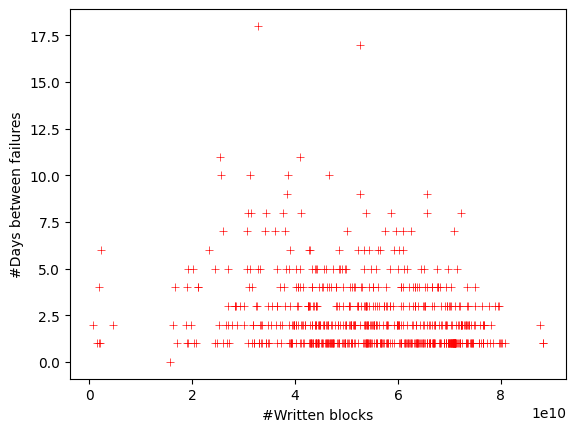

In [92]:
## Plotting the days between failures against the number of written blocks
## The number of days between failures decreases as a greater number of writes are observed

graph = sns.scatterplot(x = "written_blocks", y = 'operational_days', color = 'red', data = groupHDDFailures, marker='+')
graph.set(xlabel ="#Written blocks", ylabel = "#Days between failures")
plt.savefig('img/OperationalDaysCumBlocksWrittenScatter' + model + '.pdf')
#plt.setp(graph.get_xticklabels(), rotation=45)

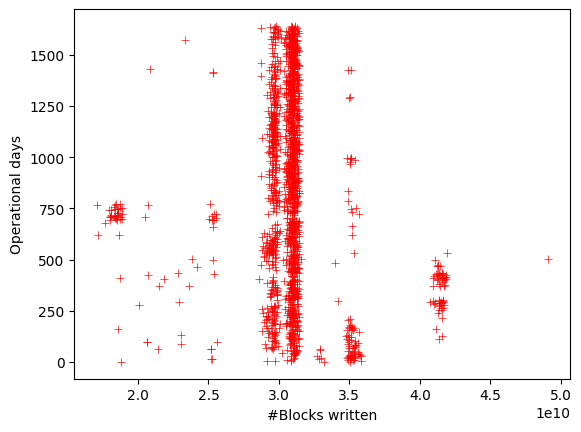

In [18]:
## Plotting operational days against the number of written blocks
## The number of blocks written per day when drive failures occur is nearly the same (see the next figure), indicating a daily backup, 
## which means that the information extracted from this dataset is mainly related to a specific application.

graph = sns.scatterplot(x = "written_blocks", y = 'operational_days_cum', color = 'red', data = groupAllInformationPerHDDModel, marker='+')
graph.set(xlabel ="#Blocks written", ylabel = "Operational days")
plt.savefig('img/operationalDaysXWrittenBlocks' + model + '.pdf')
#plt.setp(graph.get_xticklabels(), rotation=45)

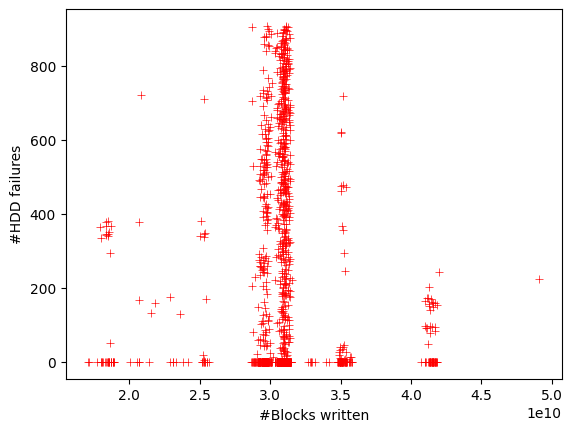

In [17]:
graph = sns.scatterplot(x = "written_blocks", y = 'failed_sum', color = 'red', data = groupAllInformationPerHDDModel, marker='+')
graph.set(xlabel ="#Blocks written", ylabel = "#HDD failures")
plt.savefig('img/hddFailuresXWrittenBlocks' + model + '.pdf')
#plt.setp(graph.get_xticklabels(), rotation=45)


In [45]:
groupHDDFailures['timestamp'] = pd.to_datetime(groupHDDFailures['timestamp'], format='%Y-%m-%d').dt.floor('D')

In [ ]:
## Calculating the following metrics: annual failure rate, mean time to failure (year), mean time to failure (monthly), mean time to failure (daily)
## The goal is to provide means to compute a dynamic MTTF, through which it will be possible to estimate future failures

hours_per_year = 365*24
numberTotalSSDs = groupHDDFailures.size

groupHDDFailures["AFR_HDDs"] = " "
groupHDDFailures["MTTF_HDDs"] = " "
groupHDDFailures["MTTFMes_HDDs"] = " "
groupHDDFailures["MTTFDia_HDDs"] = " "

for i in range(1, len(groupHDDFailures)): 
    

    numberFailedSSDs = groupHDDFailures.iloc[i].disk_sum
    if numberFailedSSDs != 0:
        temp = ((groupHDDFailures.timestamp.iloc[i] - groupHDDFailures.timestamp.iloc[0]).days)/30
        AFR_HDDs = ((numberFailedSSDs)*(12/temp))/(15290)
        MTTF_HDDs = (hours_per_year)/(AFR_HDDs)
        MTTFMes_HDDs = (12)/(AFR_HDDs)
        MTTFDia_HDDs = (365)/(AFR_HDDs)
    else: 
        AFR_HDDs = 0
        MTTF_HDDs = 0
        MTTFMes_HDDs = 0
        MTTFDia_HDDs = 0


    #resultWriteFailureRM.loc[i, "AFR_SSDs"] = AFR_SSDs
    #resultWriteFailureRM.loc[i, "mttf_SDDs"] = MTTF_SSDs
    groupHDDFailures.AFR_HDDs.iloc[i] = AFR_HDDs
    groupHDDFailures.MTTF_HDDs.iloc[i] = str(MTTF_HDDs) + ','
    groupHDDFailures.MTTFMes_HDDs.iloc[i] = str(MTTFMes_HDDs) + ','
    groupHDDFailures.MTTFDia_HDDs.iloc[i] = str(MTTFDia_HDDs) + ','

In [47]:
## Checking the resulting dataframe

groupHDDFailures.tail(100)

,timestamp,disk_id,disk_sum,blocks_sum,AFR_HDDs,MTTF_HDDs,MTTFMes_HDDs,MTTFDia_HDDs
566,2022-01-21,1,763,6.984842e+10,0.012138,"721682.6561817388,","988.6063783311491,","30070.11067423912,"
567,2022-01-23,1,764,6.712433e+10,0.012138,"721712.0157068062,","988.6465968586386,","30071.33398778359,"
568,2022-01-24,1,765,7.031945e+10,0.012145,"721254.9498910675,","988.0204793028321,","30052.289578794476,"
569,2022-01-25,1,766,7.647595e+10,0.012153,"720799.0774586597,","987.3959965187119,","30033.29489411082,"
570,2022-01-29,1,767,7.493727e+10,0.012136,"721799.6349413298,","988.7666232073012,","30074.98478922208,"
...,...,...,...,...,...,...,...,...
661,2022-06-19,3,903,7.495488e+10,0.013052,"671185.2823920265,","919.4318936877075,","27966.053433001107,"
662,2022-06-22,1,904,7.637516e+10,0.013042,"671677.5221238938,","920.1061946902655,","27986.56342182891,"
663,2022-06-26,1,905,4.023788e+10,0.013024,"672579.7863720073,","921.3421731123389,","28024.157765500306,"
664,2022-06-28,1,906,7.330839e+10,0.013023,"672658.7417218543,","921.4503311258278,","28027.44757174393,"


In [48]:
## Saving spllited values into a csv file

groupHDDFailures.to_csv('SplittedDatasetHDD/' + 'extractedMTTF'  + model + '.csv')